In [1]:
import random

import numpy as np
import torch
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from tqdm import tqdm
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [2]:
data = np.load(r'D:\heat_wave\atlantic\expand_area1\last\optimized_formula_all_variables_expand_atlantic1_surface.npz')
print(data.files)  # ['sst_obser', 'slfh', 'sshf', 'ssr', 'str', 'mld', 'analysis_temp', 'u', 'v', 'T_d', 'u_d', 'v_d', 'xx', 'yy', 'dT_dt', 'dT_dx', 'dT_dy']

sst_obser = data['sst_obser'][:, :80, :79]  # (9861, 41, 201)  #
print(sst_obser.shape)  # (9861, 41, 201)
slfh = data['slfh'][:, :80, :79]  # (9861, 41, 201)
sshf = data['sshf'][:, :80, :79]  # (9861, 41, 201)
ssr = data['ssr'][:, :80, :79]  # (9861, 41, 201)   # 可惜这个是 0
str = data['str'][:, :80, :79]  # (9861, 41, 201)
mld = data['mld'][:, :80, :79]  # (9861, 41, 201)
analysis_temp = data['analysis_temp'][:, :80, :79]  # (9861, 41, 201)
u = data['u'][:, :80, :79]  # (9861, 41, 201)
v = data['v'][:, :80, :79]  # (9861, 41, 201)
T_d = data['T_d'][:, :80, :79]  # (9861, 41, 201)
u_d = data['u_d'][:, :80, :79]  # (9861, 41, 201)
v_d = data['v_d'][:, :80, :79]  # (9861, 41, 201)
xx = data['xx'][:, :80, :79]  # (9861, 41, 201)
yy = data['yy'][:, :80, :79]  # (9861, 41, 201)
print(np.min(T_d))
print(np.max(T_d))
# print(xx)  # -5 -4.75 ... 4.75
# print(yy)  # 190  190.25 ... 239.75

dT_dt = data['dT_dt'][:, :80, :79]
dT_dx = data['dT_dx'][:, :80, :79]
dT_dy = data['dT_dy'][:, :80, :79]


['slfh', 'sshf', 'ssr', 'str', 'sst_obser', 'T_d', 'u_d', 'v_d', 'mld', 'analysis_temp', 'u', 'v', 'dT_dt', 'xx', 'yy', 'dT_dx', 'dT_dy']
(9861, 80, 79)
22.492352
36.701355


In [3]:
Q_net = (slfh + sshf + ssr + str)
Q_net.shape
Q_net = Q_net / (1025 * 4000 * mld)

In [4]:
ZAdv = u * dT_dx
ZAdv.shape

(9861, 80, 79)

In [5]:
MAdv = v * dT_dy
MAdv.shape

(9861, 80, 79)

In [6]:
VAdv = v_d * ((sst_obser -T_d ) / mld)
VAdv.shape

(9861, 80, 79)

In [8]:
R_origin = dT_dt - (Q_net[:9860,:,:] + ZAdv[:9860,:,:] + MAdv[:9860,:,:] + VAdv[:9860,:,:])
R_origin.shape

(9860, 80, 79)

In [9]:
R_origin.shape

(9860, 80, 79)

In [9]:
"""我们方法修正项"""

'我们方法修正项'

In [10]:
data1 = np.load(r'D:\heat_wave\atlantic\expand_area1\last\Dt_with_R_e1.npz')
data2 = np.load(r'D:\heat_wave\atlantic\expand_area1\last\Dt_with_R_e2.npz')
data3 = np.load(r'D:\heat_wave\atlantic\expand_area1\last\Dt_with_R_e3.npz')
data4 = np.load(r'D:\heat_wave\atlantic\expand_area1\last\Dt_with_R_e4.npz')
data5 = np.load(r'D:\heat_wave\atlantic\expand_area1\last\Dt_with_R_e5.npz')
data1.files

['dt_R']

In [11]:
dt_R1 = data1['dt_R'][:].reshape(9860,80,79)
dt_R2 = data2['dt_R'][:].reshape(9860,80,79)
dt_R3 = data3['dt_R'][:].reshape(9860,80,79)
dt_R4 = data4['dt_R'][:].reshape(9860,80,79)
dt_R5 = data5['dt_R'][:].reshape(9860,80,79)
dt_R1.shape

(9860, 80, 79)

In [12]:
"修正后的R"
R_recur1 = dt_R1 - dT_dt
R_recur2 = dt_R2 - dT_dt
R_recur3 = dt_R3 - dT_dt
R_recur4 = dt_R4 - dT_dt
R_recur5 = dt_R5 - dT_dt
R_recur1

array([[[ 0.03586979,  0.03347259,  0.05957322, ...,  0.18646735,
          0.19701599,  0.20121458],
        [ 0.05055882,  0.04700889,  0.06782705, ...,  0.19567284,
          0.20308302,  0.20796981],
        [ 0.05712174,  0.06273837,  0.07854559, ...,  0.19160873,
          0.20715764,  0.20956194],
        ...,
        [ 0.15932229,  0.11547898,  0.10034126, ...,  0.16585273,
          0.16188954,  0.13897759],
        [ 0.15250617,  0.14199658,  0.14207235, ...,  0.21118517,
          0.19232756,  0.13984802],
        [ 0.16378003,  0.16585186,  0.16543409, ...,  0.2001392 ,
          0.17457803,  0.13594787]],

       [[ 0.03044586,  0.02774056,  0.04302625, ...,  0.0486625 ,
          0.06338446,  0.06865058],
        [ 0.03752837,  0.03035252,  0.04698587, ...,  0.07801766,
          0.10162099,  0.09557401],
        [ 0.04620308,  0.03525616,  0.04793969, ...,  0.09887834,
          0.12548174,  0.12663248],
        ...,
        [ 0.12780592,  0.09289791,  0.08991582, ...,  

In [13]:
R_recur = ((R_recur1 + R_recur2 + R_recur3 + R_recur4 + R_recur5) / 5)
R_recur

array([[[ 0.02390832,  0.02725428,  0.05739463, ...,  0.18423201,
          0.20143357,  0.212904  ],
        [ 0.03836343,  0.04028901,  0.06597659, ...,  0.19318132,
          0.20801635,  0.21969919],
        [ 0.04502613,  0.05579453,  0.07682253, ...,  0.18921772,
          0.21201761,  0.22122557],
        ...,
        [ 0.14401527,  0.11933136,  0.09818447, ...,  0.16285832,
          0.16673253,  0.15164636],
        [ 0.14027078,  0.13991936,  0.14181487, ...,  0.20777342,
          0.19717088,  0.15250286],
        [ 0.15274742,  0.16048196,  0.16502085, ...,  0.1965462 ,
          0.18078193,  0.14906101]],

       [[ 0.01874388,  0.02132713,  0.04093076, ...,  0.04672079,
          0.06744719,  0.07988962],
        [ 0.02589727,  0.02345898,  0.0454662 , ...,  0.07614927,
          0.1055768 ,  0.10671985],
        [ 0.03458868,  0.02821356,  0.04669535, ...,  0.09688549,
          0.12964737,  0.1379139 ],
        ...,
        [ 0.11189172,  0.09634877,  0.08805746, ...,  

In [14]:
# 首先 我们先画 JJA季节的贡献图   JJA： 6  7  8 月  即  06/01 - 08/31  当然，会做一个区域平均
# 同时，我们也会对每一年的JJA做一个平均  ---》1993 - 2019年

In [14]:
#  计算索引
import pandas as pd
import datetime

#创建时间范围
start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(2019,12,31)
dates = pd.date_range(start = start_date, end = end_date, freq = 'D')

index = dates.get_loc(datetime.datetime(2019,8,31)) 
index

9738

In [15]:
# JJA   93
Q_net_JJA_93 = Q_net[151:243,:,:]
Q_net_JJA_93.shape

ZAdv_JJA_93 = ZAdv[151:243,:,:]
MAdv_JJA_93 = MAdv[151:243,:,:]
VAdv_JJA_93 = VAdv[151:243,:,:]
R_origin_JJA_93 = R_origin[151:243,:,:]
dT_dt_JJA_93 = dT_dt[151:243,:,:]
R_recur_JJA_93 = R_recur[151:243,:,:]

In [16]:
# JJA   94
Q_net_JJA_94 = Q_net[516:608,:,:]
Q_net_JJA_94.shape

ZAdv_JJA_94 = ZAdv[516:608,:,:]
MAdv_JJA_94 = MAdv[516:608,:,:]
VAdv_JJA_94 = VAdv[516:608,:,:]
R_origin_JJA_94 = R_origin[516:608,:,:]
dT_dt_JJA_94 = dT_dt[516:608,:,:]
R_recur_JJA_94 = R_recur[516:608,:,:]

In [17]:
# JJA   95
Q_net_JJA_95 = Q_net[881:973,:,:]
ZAdv_JJA_95 = ZAdv[881:973,:,:]
MAdv_JJA_95 = MAdv[881:973,:,:]
VAdv_JJA_95 = VAdv[881:973,:,:]
R_origin_JJA_95 = R_origin[881:973,:,:]
dT_dt_JJA_95 = dT_dt[881:973,:,:]
R_recur_JJA_95 = R_recur[881:973,:,:]

In [18]:
# JJA   96
Q_net_JJA_96 = Q_net[1247:1339,:,:]
ZAdv_JJA_96 = ZAdv[1247:1339,:,:]
MAdv_JJA_96 = MAdv[1247:1339,:,:]
VAdv_JJA_96 = VAdv[1247:1339,:,:]
R_origin_JJA_96 = R_origin[1247:1339,:,:]
dT_dt_JJA_96 = dT_dt[1247:1339,:,:]
R_recur_JJA_96 = R_recur[1247:1339,:,:]

In [19]:
# JJA   97
Q_net_JJA_97 = Q_net[1612:1704,:,:]
ZAdv_JJA_97 = ZAdv[1612:1704,:,:]
MAdv_JJA_97 = MAdv[1612:1704,:,:]
VAdv_JJA_97 = VAdv[1612:1704,:,:]
R_origin_JJA_97 = R_origin[1612:1704,:,:]
dT_dt_JJA_97 = dT_dt[1612:1704,:,:]
R_recur_JJA_97 = R_recur[1612:1704,:,:]

In [20]:
# JJA   98
Q_net_JJA_98 = Q_net[1977:2069,:,:]
ZAdv_JJA_98 = ZAdv[1977:2069,:,:]
MAdv_JJA_98 = MAdv[1977:2069,:,:]
VAdv_JJA_98 = VAdv[1977:2069,:,:]
R_origin_JJA_98 = R_origin[1977:2069,:,:]
dT_dt_JJA_98 = dT_dt[1977:2069,:,:]
R_recur_JJA_98 = R_recur[1977:2069,:,:]

In [21]:
# JJA   99
Q_net_JJA_99 = Q_net[2342:2434,:,:]
ZAdv_JJA_99 = ZAdv[2342:2434,:,:]
MAdv_JJA_99 = MAdv[2342:2434,:,:]
VAdv_JJA_99 = VAdv[2342:2434,:,:]
R_origin_JJA_99 = R_origin[2342:2434,:,:]
dT_dt_JJA_99 = dT_dt[2342:2434,:,:]
R_recur_JJA_99 = R_recur[2342:2434,:,:]

In [22]:
# JJA   00
Q_net_JJA_00 = Q_net[2708:2799,:,:]
ZAdv_JJA_00 = ZAdv[2708:2799,:,:]
MAdv_JJA_00 = MAdv[2708:2799,:,:]
VAdv_JJA_00 = VAdv[2708:2799,:,:]
R_origin_JJA_00 = R_origin[2708:2799,:,:]
dT_dt_JJA_00 = dT_dt[2708:2799,:,:]
R_recur_JJA_00 = R_recur[2708:2799,:,:]

In [23]:
# JJA   01
Q_net_JJA_01 = Q_net[3073:3165,:,:]
ZAdv_JJA_01 = ZAdv[3073:3165,:,:]
MAdv_JJA_01 = MAdv[3073:3165,:,:]
VAdv_JJA_01 = VAdv[3073:3165,:,:]
R_origin_JJA_01 = R_origin[3073:3165,:,:]
dT_dt_JJA_01 = dT_dt[3073:3165,:,:]
R_recur_JJA_01 = R_recur[3073:3165,:,:]

In [24]:
# JJA   02
Q_net_JJA_02 = Q_net[3438:3529,:,:]
ZAdv_JJA_02 = ZAdv[3438:3529,:,:]
MAdv_JJA_02 = MAdv[3438:3529,:,:]
VAdv_JJA_02 = VAdv[3438:3529,:,:]
R_origin_JJA_02 = R_origin[3438:3529,:,:]
dT_dt_JJA_02 = dT_dt[3438:3529,:,:]
R_recur_JJA_02 = R_recur[3438:3529,:,:]

In [25]:
# JJA   03
Q_net_JJA_03 = Q_net[3803:3895,:,:]
ZAdv_JJA_03 = ZAdv[3803:3895,:,:]
MAdv_JJA_03 = MAdv[3803:3895,:,:]
VAdv_JJA_03 = VAdv[3803:3895,:,:]
R_origin_JJA_03 = R_origin[3803:3895,:,:]
dT_dt_JJA_03 = dT_dt[3803:3895,:,:]
R_recur_JJA_03 = R_recur[3803:3895,:,:]

In [26]:
# JJA   04
Q_net_JJA_04 = Q_net[4169:4261,:,:]
ZAdv_JJA_04 = ZAdv[4169:4261,:,:]
MAdv_JJA_04 = MAdv[4169:4261,:,:]
VAdv_JJA_04 = VAdv[4169:4261,:,:]
R_origin_JJA_04 = R_origin[4169:4261,:,:]
dT_dt_JJA_04 = dT_dt[4169:4261,:,:]
R_recur_JJA_04 = R_recur[4169:4261,:,:]

In [27]:
# JJA   05
Q_net_JJA_05 = Q_net[4534:4626,:,:]
ZAdv_JJA_05 = ZAdv[4534:4626,:,:]
MAdv_JJA_05 = MAdv[4534:4626,:,:]
VAdv_JJA_05 = VAdv[4534:4626,:,:]
R_origin_JJA_05 = R_origin[4534:4626,:,:]
dT_dt_JJA_05 = dT_dt[4534:4626,:,:]
R_recur_JJA_05 = R_recur[4534:4626,:,:]

In [28]:
# JJA   06
Q_net_JJA_06 = Q_net[4899:4990,:,:]
ZAdv_JJA_06 = ZAdv[4899:4990,:,:]
MAdv_JJA_06 = MAdv[4899:4990,:,:]
VAdv_JJA_06 = VAdv[4899:4990,:,:]
R_origin_JJA_06 = R_origin[4899:4990,:,:]
dT_dt_JJA_06 = dT_dt[4899:4990,:,:]
R_recur_JJA_06 = R_recur[4899:4990,:,:]

In [29]:
# JJA   07
Q_net_JJA_07 = Q_net[5264:5356,:,:]
ZAdv_JJA_07 = ZAdv[5264:5356,:,:]
MAdv_JJA_07 = MAdv[5264:5356,:,:]
VAdv_JJA_07 = VAdv[5264:5356,:,:]
R_origin_JJA_07 = R_origin[5264:5356,:,:]
dT_dt_JJA_07 = dT_dt[5264:5356,:,:]
R_recur_JJA_07 = R_recur[5264:5356,:,:]

In [30]:
# JJA   08
Q_net_JJA_08 = Q_net[5630:5722,:,:]
ZAdv_JJA_08 = ZAdv[5630:5722,:,:]
MAdv_JJA_08 = MAdv[5630:5722,:,:]
VAdv_JJA_08 = VAdv[5630:5722,:,:]
R_origin_JJA_08 = R_origin[5630:5722,:,:]
dT_dt_JJA_08 = dT_dt[5630:5722,:,:]
R_recur_JJA_08 = R_recur[5630:5722,:,:]

In [31]:
# JJA   09
Q_net_JJA_09 = Q_net[5995:6087,:,:]
ZAdv_JJA_09 = ZAdv[5995:6087,:,:]
MAdv_JJA_09 = MAdv[5995:6087,:,:]
VAdv_JJA_09 = VAdv[5995:6087,:,:]
R_origin_JJA_09 = R_origin[5995:6087,:,:]
dT_dt_JJA_09 = dT_dt[5995:6087,:,:]
R_recur_JJA_09 = R_recur[5995:6087,:,:]

In [32]:
# JJA   10
Q_net_JJA_10 = Q_net[6360:6452,:,:]
ZAdv_JJA_10 = ZAdv[6360:6452,:,:]
MAdv_JJA_10 = MAdv[6360:6452,:,:]
VAdv_JJA_10 = VAdv[6360:6452,:,:]
R_origin_JJA_10 = R_origin[6360:6452,:,:]
dT_dt_JJA_10 = dT_dt[6360:6452,:,:]
R_recur_JJA_10 = R_recur[6360:6452,:,:]

In [33]:
# JJA   11
Q_net_JJA_11 = Q_net[6725:6817,:,:]
ZAdv_JJA_11 = ZAdv[6725:6817,:,:]
MAdv_JJA_11 = MAdv[6725:6817,:,:]
VAdv_JJA_11 = VAdv[6725:6817,:,:]
R_origin_JJA_11 = R_origin[6725:6817,:,:]
dT_dt_JJA_11 = dT_dt[6725:6817,:,:]
R_recur_JJA_11 = R_recur[6725:6817,:,:]

In [34]:
# JJA   12
Q_net_JJA_12 = Q_net[7091:7183,:,:]
ZAdv_JJA_12 = ZAdv[7091:7183,:,:]
MAdv_JJA_12 = MAdv[7091:7183,:,:]
VAdv_JJA_12 = VAdv[7091:7183,:,:]
R_origin_JJA_12 = R_origin[7091:7183,:,:]
dT_dt_JJA_12 = dT_dt[7091:7183,:,:]
R_recur_JJA_12 = R_recur[7091:7183,:,:]

In [35]:
# JJA   13
Q_net_JJA_13 = Q_net[7456:7548,:,:]
ZAdv_JJA_13 = ZAdv[7456:7548,:,:]
MAdv_JJA_13 = MAdv[7456:7548,:,:]
VAdv_JJA_13 = VAdv[7456:7548,:,:]
R_origin_JJA_13 = R_origin[7456:7548,:,:]
dT_dt_JJA_13 = dT_dt[7456:7548,:,:]
R_recur_JJA_13 = R_recur[7456:7548,:,:]

In [36]:
# JJA   14
Q_net_JJA_14 = Q_net[7821:7913,:,:]
ZAdv_JJA_14 = ZAdv[7821:7913,:,:]
MAdv_JJA_14 = MAdv[7821:7913,:,:]
VAdv_JJA_14 = VAdv[7821:7913,:,:]
R_origin_JJA_14 = R_origin[7821:7913,:,:]
dT_dt_JJA_14 = dT_dt[7821:7913,:,:]
R_recur_JJA_14 = R_recur[7821:7913,:,:]

In [37]:
# JJA   15
Q_net_JJA_15 = Q_net[8186:8278,:,:]
ZAdv_JJA_15 = ZAdv[8186:8278,:,:]
MAdv_JJA_15 = MAdv[8186:8278,:,:]
VAdv_JJA_15 = VAdv[8186:8278,:,:]
R_origin_JJA_15 = R_origin[8186:8278,:,:]
dT_dt_JJA_15 = dT_dt[8186:8278,:,:]
R_recur_JJA_15 = R_recur[8186:8278,:,:]

In [38]:
# JJA   16
Q_net_JJA_16 = Q_net[8552:8644,:,:]
ZAdv_JJA_16 = ZAdv[8552:8644,:,:]
MAdv_JJA_16 = MAdv[8552:8644,:,:]
VAdv_JJA_16 = VAdv[8552:8644,:,:]
R_origin_JJA_16 = R_origin[8552:8644,:,:]
dT_dt_JJA_16 = dT_dt[8552:8644,:,:]
R_recur_JJA_16 = R_recur[8552:8644,:,:]

In [39]:
# JJA   17
Q_net_JJA_17 = Q_net[8917:9009,:,:]
ZAdv_JJA_17 = ZAdv[8917:9009,:,:]
MAdv_JJA_17 = MAdv[8917:9009,:,:]
VAdv_JJA_17 = VAdv[8917:9009,:,:]
R_origin_JJA_17 = R_origin[8917:9009,:,:]
dT_dt_JJA_17 = dT_dt[8917:9009,:,:]
R_recur_JJA_17 = R_recur[8917:9009,:,:]

In [40]:
# JJA   18
Q_net_JJA_18 = Q_net[9282:9374,:,:]
ZAdv_JJA_18 = ZAdv[9282:9374,:,:]
MAdv_JJA_18 = MAdv[9282:9374,:,:]
VAdv_JJA_18 = VAdv[9282:9374,:,:]
R_origin_JJA_18 = R_origin[9282:9374,:,:]
dT_dt_JJA_18 = dT_dt[9282:9374,:,:]
R_recur_JJA_18 = R_recur[9282:9374,:,:]

In [41]:
# JJA   19
Q_net_JJA_19 = Q_net[9647:9739,:,:]
ZAdv_JJA_19 = ZAdv[9647:9739,:,:]
MAdv_JJA_19 = MAdv[9647:9739,:,:]
VAdv_JJA_19 = VAdv[9647:9739,:,:]
R_origin_JJA_19 = R_origin[9647:9739,:,:]
dT_dt_JJA_19 = dT_dt[9647:9739,:,:]
R_recur_JJA_19 = R_recur[9647:9739,:,:]

In [42]:
Q_net_JJA_93 = np.mean(Q_net_JJA_93, axis = (1,2)).reshape(-1,1)
Q_net_JJA_94 = np.mean(Q_net_JJA_94, axis = (1,2)).reshape(-1,1)
Q_net_JJA_95 = np.mean(Q_net_JJA_95, axis = (1,2)).reshape(-1,1)
Q_net_JJA_96 = np.mean(Q_net_JJA_96, axis = (1,2)).reshape(-1,1)
Q_net_JJA_97 = np.mean(Q_net_JJA_97, axis = (1,2)).reshape(-1,1)
Q_net_JJA_98 = np.mean(Q_net_JJA_98, axis = (1,2)).reshape(-1,1)
Q_net_JJA_99 = np.mean(Q_net_JJA_99, axis = (1,2)).reshape(-1,1)
Q_net_JJA_00 = np.mean(Q_net_JJA_00, axis = (1,2)).reshape(-1,1)
Q_net_JJA_01 = np.mean(Q_net_JJA_01, axis = (1,2)).reshape(-1,1)
Q_net_JJA_02 = np.mean(Q_net_JJA_02, axis = (1,2)).reshape(-1,1)
Q_net_JJA_03 = np.mean(Q_net_JJA_03, axis = (1,2)).reshape(-1,1)
Q_net_JJA_04 = np.mean(Q_net_JJA_04, axis = (1,2)).reshape(-1,1)
Q_net_JJA_05 = np.mean(Q_net_JJA_05, axis = (1,2)).reshape(-1,1)
Q_net_JJA_06 = np.mean(Q_net_JJA_06, axis = (1,2)).reshape(-1,1)
Q_net_JJA_07 = np.mean(Q_net_JJA_07, axis = (1,2)).reshape(-1,1)
Q_net_JJA_08 = np.mean(Q_net_JJA_08, axis = (1,2)).reshape(-1,1)
Q_net_JJA_09 = np.mean(Q_net_JJA_09, axis = (1,2)).reshape(-1,1)
Q_net_JJA_10 = np.mean(Q_net_JJA_10, axis = (1,2)).reshape(-1,1)
Q_net_JJA_11 = np.mean(Q_net_JJA_11, axis = (1,2)).reshape(-1,1)
Q_net_JJA_12 = np.mean(Q_net_JJA_12, axis = (1,2)).reshape(-1,1)
Q_net_JJA_13 = np.mean(Q_net_JJA_13, axis = (1,2)).reshape(-1,1)
Q_net_JJA_14 = np.mean(Q_net_JJA_14, axis = (1,2)).reshape(-1,1)
Q_net_JJA_15 = np.mean(Q_net_JJA_15, axis = (1,2)).reshape(-1,1)
Q_net_JJA_16 = np.mean(Q_net_JJA_16, axis = (1,2)).reshape(-1,1)
Q_net_JJA_17 = np.mean(Q_net_JJA_17, axis = (1,2)).reshape(-1,1)
Q_net_JJA_18 = np.mean(Q_net_JJA_18, axis = (1,2)).reshape(-1,1)
Q_net_JJA_19 = np.mean(Q_net_JJA_19, axis = (1,2)).reshape(-1,1)

In [43]:
Q_net_JJA_93 = np.mean(Q_net_JJA_93).reshape(-1,1)
Q_net_JJA_94 = np.mean(Q_net_JJA_94).reshape(-1,1)
Q_net_JJA_95 = np.mean(Q_net_JJA_95).reshape(-1,1)
Q_net_JJA_96 = np.mean(Q_net_JJA_96).reshape(-1,1)
Q_net_JJA_97 = np.mean(Q_net_JJA_97).reshape(-1,1)
Q_net_JJA_98 = np.mean(Q_net_JJA_98).reshape(-1,1)
Q_net_JJA_99 = np.mean(Q_net_JJA_99).reshape(-1,1)
Q_net_JJA_00 = np.mean(Q_net_JJA_00).reshape(-1,1)
Q_net_JJA_01 = np.mean(Q_net_JJA_01).reshape(-1,1)
Q_net_JJA_02 = np.mean(Q_net_JJA_02).reshape(-1,1)
Q_net_JJA_03 = np.mean(Q_net_JJA_03).reshape(-1,1)
Q_net_JJA_04 = np.mean(Q_net_JJA_04).reshape(-1,1)
Q_net_JJA_05 = np.mean(Q_net_JJA_05).reshape(-1,1)
Q_net_JJA_06 = np.mean(Q_net_JJA_06).reshape(-1,1)
Q_net_JJA_07 = np.mean(Q_net_JJA_07).reshape(-1,1)
Q_net_JJA_08 = np.mean(Q_net_JJA_08).reshape(-1,1)
Q_net_JJA_09 = np.mean(Q_net_JJA_09).reshape(-1,1)
Q_net_JJA_10 = np.mean(Q_net_JJA_10).reshape(-1,1)
Q_net_JJA_11 = np.mean(Q_net_JJA_11).reshape(-1,1)
Q_net_JJA_12 = np.mean(Q_net_JJA_12).reshape(-1,1)
Q_net_JJA_13 = np.mean(Q_net_JJA_13).reshape(-1,1)
Q_net_JJA_14 = np.mean(Q_net_JJA_14).reshape(-1,1)
Q_net_JJA_15 = np.mean(Q_net_JJA_15).reshape(-1,1)
Q_net_JJA_16 = np.mean(Q_net_JJA_16).reshape(-1,1)
Q_net_JJA_17 = np.mean(Q_net_JJA_17).reshape(-1,1)
Q_net_JJA_18 = np.mean(Q_net_JJA_18).reshape(-1,1)
Q_net_JJA_19 = np.mean(Q_net_JJA_19).reshape(-1,1)

In [44]:
ZAdv_JJA_93 = np.mean(ZAdv_JJA_93, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_94 = np.mean(ZAdv_JJA_94, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_95 = np.mean(ZAdv_JJA_95, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_96 = np.mean(ZAdv_JJA_96, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_97 = np.mean(ZAdv_JJA_97, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_98 = np.mean(ZAdv_JJA_98, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_99 = np.mean(ZAdv_JJA_99, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_00 = np.mean(ZAdv_JJA_00, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_01 = np.mean(ZAdv_JJA_01, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_02 = np.mean(ZAdv_JJA_02, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_03 = np.mean(ZAdv_JJA_03, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_04 = np.mean(ZAdv_JJA_04, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_05 = np.mean(ZAdv_JJA_05, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_06 = np.mean(ZAdv_JJA_06, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_07 = np.mean(ZAdv_JJA_07, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_08 = np.mean(ZAdv_JJA_08, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_09 = np.mean(ZAdv_JJA_09, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_10 = np.mean(ZAdv_JJA_10, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_11 = np.mean(ZAdv_JJA_11, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_12 = np.mean(ZAdv_JJA_12, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_13 = np.mean(ZAdv_JJA_13, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_14 = np.mean(ZAdv_JJA_14, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_15 = np.mean(ZAdv_JJA_15, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_16 = np.mean(ZAdv_JJA_16, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_17 = np.mean(ZAdv_JJA_17, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_18 = np.mean(ZAdv_JJA_18, axis = (1,2)).reshape(-1,1)
ZAdv_JJA_19 = np.mean(ZAdv_JJA_19, axis = (1,2)).reshape(-1,1)

In [45]:
ZAdv_JJA_93 = np.mean(ZAdv_JJA_93).reshape(-1,1)
ZAdv_JJA_94 = np.mean(ZAdv_JJA_94).reshape(-1,1)
ZAdv_JJA_95 = np.mean(ZAdv_JJA_95).reshape(-1,1)
ZAdv_JJA_96 = np.mean(ZAdv_JJA_96).reshape(-1,1)
ZAdv_JJA_97 = np.mean(ZAdv_JJA_97).reshape(-1,1)
ZAdv_JJA_98 = np.mean(ZAdv_JJA_98).reshape(-1,1)
ZAdv_JJA_99 = np.mean(ZAdv_JJA_99).reshape(-1,1)
ZAdv_JJA_00 = np.mean(ZAdv_JJA_00).reshape(-1,1)
ZAdv_JJA_01 = np.mean(ZAdv_JJA_01).reshape(-1,1)
ZAdv_JJA_02 = np.mean(ZAdv_JJA_02).reshape(-1,1)
ZAdv_JJA_03 = np.mean(ZAdv_JJA_03).reshape(-1,1)
ZAdv_JJA_04 = np.mean(ZAdv_JJA_04).reshape(-1,1)
ZAdv_JJA_05 = np.mean(ZAdv_JJA_05).reshape(-1,1)
ZAdv_JJA_06 = np.mean(ZAdv_JJA_06).reshape(-1,1)
ZAdv_JJA_07 = np.mean(ZAdv_JJA_07).reshape(-1,1)
ZAdv_JJA_08 = np.mean(ZAdv_JJA_08).reshape(-1,1)
ZAdv_JJA_09 = np.mean(ZAdv_JJA_09).reshape(-1,1)
ZAdv_JJA_10 = np.mean(ZAdv_JJA_10).reshape(-1,1)
ZAdv_JJA_11 = np.mean(ZAdv_JJA_11).reshape(-1,1)
ZAdv_JJA_12 = np.mean(ZAdv_JJA_12).reshape(-1,1)
ZAdv_JJA_13 = np.mean(ZAdv_JJA_13).reshape(-1,1)
ZAdv_JJA_14 = np.mean(ZAdv_JJA_14).reshape(-1,1)
ZAdv_JJA_15 = np.mean(ZAdv_JJA_15).reshape(-1,1)
ZAdv_JJA_16 = np.mean(ZAdv_JJA_16).reshape(-1,1)
ZAdv_JJA_17 = np.mean(ZAdv_JJA_17).reshape(-1,1)
ZAdv_JJA_18 = np.mean(ZAdv_JJA_18).reshape(-1,1)
ZAdv_JJA_19 = np.mean(ZAdv_JJA_19).reshape(-1,1)

In [46]:
MAdv_JJA_93 = np.mean(MAdv_JJA_93, axis = (1,2)).reshape(-1,1)
MAdv_JJA_94 = np.mean(MAdv_JJA_94, axis = (1,2)).reshape(-1,1)
MAdv_JJA_95 = np.mean(MAdv_JJA_95, axis = (1,2)).reshape(-1,1)
MAdv_JJA_96 = np.mean(MAdv_JJA_96, axis = (1,2)).reshape(-1,1)
MAdv_JJA_97 = np.mean(MAdv_JJA_97, axis = (1,2)).reshape(-1,1)
MAdv_JJA_98 = np.mean(MAdv_JJA_98, axis = (1,2)).reshape(-1,1)
MAdv_JJA_99 = np.mean(MAdv_JJA_99, axis = (1,2)).reshape(-1,1)
MAdv_JJA_00 = np.mean(MAdv_JJA_00, axis = (1,2)).reshape(-1,1)
MAdv_JJA_01 = np.mean(MAdv_JJA_01, axis = (1,2)).reshape(-1,1)
MAdv_JJA_02 = np.mean(MAdv_JJA_02, axis = (1,2)).reshape(-1,1)
MAdv_JJA_03 = np.mean(MAdv_JJA_03, axis = (1,2)).reshape(-1,1)
MAdv_JJA_04 = np.mean(MAdv_JJA_04, axis = (1,2)).reshape(-1,1)
MAdv_JJA_05 = np.mean(MAdv_JJA_05, axis = (1,2)).reshape(-1,1)
MAdv_JJA_06 = np.mean(MAdv_JJA_06, axis = (1,2)).reshape(-1,1)
MAdv_JJA_07 = np.mean(MAdv_JJA_07, axis = (1,2)).reshape(-1,1)
MAdv_JJA_08 = np.mean(MAdv_JJA_08, axis = (1,2)).reshape(-1,1)
MAdv_JJA_09 = np.mean(MAdv_JJA_09, axis = (1,2)).reshape(-1,1)
MAdv_JJA_10 = np.mean(MAdv_JJA_10, axis = (1,2)).reshape(-1,1)
MAdv_JJA_11 = np.mean(MAdv_JJA_11, axis = (1,2)).reshape(-1,1)
MAdv_JJA_12 = np.mean(MAdv_JJA_12, axis = (1,2)).reshape(-1,1)
MAdv_JJA_13 = np.mean(MAdv_JJA_13, axis = (1,2)).reshape(-1,1)
MAdv_JJA_14 = np.mean(MAdv_JJA_14, axis = (1,2)).reshape(-1,1)
MAdv_JJA_15 = np.mean(MAdv_JJA_15, axis = (1,2)).reshape(-1,1)
MAdv_JJA_16 = np.mean(MAdv_JJA_16, axis = (1,2)).reshape(-1,1)
MAdv_JJA_17 = np.mean(MAdv_JJA_17, axis = (1,2)).reshape(-1,1)
MAdv_JJA_18 = np.mean(MAdv_JJA_18, axis = (1,2)).reshape(-1,1)
MAdv_JJA_19 = np.mean(MAdv_JJA_19, axis = (1,2)).reshape(-1,1)

In [47]:
MAdv_JJA_93 = np.mean(MAdv_JJA_93).reshape(-1,1)
MAdv_JJA_94 = np.mean(MAdv_JJA_94).reshape(-1,1)
MAdv_JJA_95 = np.mean(MAdv_JJA_95).reshape(-1,1)
MAdv_JJA_96 = np.mean(MAdv_JJA_96).reshape(-1,1)
MAdv_JJA_97 = np.mean(MAdv_JJA_97).reshape(-1,1)
MAdv_JJA_98 = np.mean(MAdv_JJA_98).reshape(-1,1)
MAdv_JJA_99 = np.mean(MAdv_JJA_99).reshape(-1,1)
MAdv_JJA_00 = np.mean(MAdv_JJA_00).reshape(-1,1)
MAdv_JJA_01 = np.mean(MAdv_JJA_01).reshape(-1,1)
MAdv_JJA_02 = np.mean(MAdv_JJA_02).reshape(-1,1)
MAdv_JJA_03 = np.mean(MAdv_JJA_03).reshape(-1,1)
MAdv_JJA_04 = np.mean(MAdv_JJA_04).reshape(-1,1)
MAdv_JJA_05 = np.mean(MAdv_JJA_05).reshape(-1,1)
MAdv_JJA_06 = np.mean(MAdv_JJA_06).reshape(-1,1)
MAdv_JJA_07 = np.mean(MAdv_JJA_07).reshape(-1,1)
MAdv_JJA_08 = np.mean(MAdv_JJA_08).reshape(-1,1)
MAdv_JJA_09 = np.mean(MAdv_JJA_09).reshape(-1,1)
MAdv_JJA_10 = np.mean(MAdv_JJA_10).reshape(-1,1)
MAdv_JJA_11 = np.mean(MAdv_JJA_11).reshape(-1,1)
MAdv_JJA_12 = np.mean(MAdv_JJA_12).reshape(-1,1)
MAdv_JJA_13 = np.mean(MAdv_JJA_13).reshape(-1,1)
MAdv_JJA_14 = np.mean(MAdv_JJA_14).reshape(-1,1)
MAdv_JJA_15 = np.mean(MAdv_JJA_15).reshape(-1,1)
MAdv_JJA_16 = np.mean(MAdv_JJA_16).reshape(-1,1)
MAdv_JJA_17 = np.mean(MAdv_JJA_17).reshape(-1,1)
MAdv_JJA_18 = np.mean(MAdv_JJA_18).reshape(-1,1)
MAdv_JJA_19 = np.mean(MAdv_JJA_19).reshape(-1,1)

In [48]:
VAdv_JJA_93 = np.mean(VAdv_JJA_93, axis = (1,2)).reshape(-1,1)
VAdv_JJA_94 = np.mean(VAdv_JJA_94, axis = (1,2)).reshape(-1,1)
VAdv_JJA_95 = np.mean(VAdv_JJA_95, axis = (1,2)).reshape(-1,1)
VAdv_JJA_96 = np.mean(VAdv_JJA_96, axis = (1,2)).reshape(-1,1)
VAdv_JJA_97 = np.mean(VAdv_JJA_97, axis = (1,2)).reshape(-1,1)
VAdv_JJA_98 = np.mean(VAdv_JJA_98, axis = (1,2)).reshape(-1,1)
VAdv_JJA_99 = np.mean(VAdv_JJA_99, axis = (1,2)).reshape(-1,1)
VAdv_JJA_00 = np.mean(VAdv_JJA_00, axis = (1,2)).reshape(-1,1)
VAdv_JJA_01 = np.mean(VAdv_JJA_01, axis = (1,2)).reshape(-1,1)
VAdv_JJA_02 = np.mean(VAdv_JJA_02, axis = (1,2)).reshape(-1,1)
VAdv_JJA_03 = np.mean(VAdv_JJA_03, axis = (1,2)).reshape(-1,1)
VAdv_JJA_04 = np.mean(VAdv_JJA_04, axis = (1,2)).reshape(-1,1)
VAdv_JJA_05 = np.mean(VAdv_JJA_05, axis = (1,2)).reshape(-1,1)
VAdv_JJA_06 = np.mean(VAdv_JJA_06, axis = (1,2)).reshape(-1,1)
VAdv_JJA_07 = np.mean(VAdv_JJA_07, axis = (1,2)).reshape(-1,1)
VAdv_JJA_08 = np.mean(VAdv_JJA_08, axis = (1,2)).reshape(-1,1)
VAdv_JJA_09 = np.mean(VAdv_JJA_09, axis = (1,2)).reshape(-1,1)
VAdv_JJA_10 = np.mean(VAdv_JJA_10, axis = (1,2)).reshape(-1,1)
VAdv_JJA_11 = np.mean(VAdv_JJA_11, axis = (1,2)).reshape(-1,1)
VAdv_JJA_12 = np.mean(VAdv_JJA_12, axis = (1,2)).reshape(-1,1)
VAdv_JJA_13 = np.mean(VAdv_JJA_13, axis = (1,2)).reshape(-1,1)
VAdv_JJA_14 = np.mean(VAdv_JJA_14, axis = (1,2)).reshape(-1,1)
VAdv_JJA_15 = np.mean(VAdv_JJA_15, axis = (1,2)).reshape(-1,1)
VAdv_JJA_16 = np.mean(VAdv_JJA_16, axis = (1,2)).reshape(-1,1)
VAdv_JJA_17 = np.mean(VAdv_JJA_17, axis = (1,2)).reshape(-1,1)
VAdv_JJA_18 = np.mean(VAdv_JJA_18, axis = (1,2)).reshape(-1,1)
VAdv_JJA_19 = np.mean(VAdv_JJA_19, axis = (1,2)).reshape(-1,1)

In [49]:
VAdv_JJA_93 = np.mean(VAdv_JJA_93).reshape(-1,1)
VAdv_JJA_94 = np.mean(VAdv_JJA_94).reshape(-1,1)
VAdv_JJA_95 = np.mean(VAdv_JJA_95).reshape(-1,1)
VAdv_JJA_96 = np.mean(VAdv_JJA_96).reshape(-1,1)
VAdv_JJA_97 = np.mean(VAdv_JJA_97).reshape(-1,1)
VAdv_JJA_98 = np.mean(VAdv_JJA_98).reshape(-1,1)
VAdv_JJA_99 = np.mean(VAdv_JJA_99).reshape(-1,1)
VAdv_JJA_00 = np.mean(VAdv_JJA_00).reshape(-1,1)
VAdv_JJA_01 = np.mean(VAdv_JJA_01).reshape(-1,1)
VAdv_JJA_02 = np.mean(VAdv_JJA_02).reshape(-1,1)
VAdv_JJA_03 = np.mean(VAdv_JJA_03).reshape(-1,1)
VAdv_JJA_04 = np.mean(VAdv_JJA_04).reshape(-1,1)
VAdv_JJA_05 = np.mean(VAdv_JJA_05).reshape(-1,1)
VAdv_JJA_06 = np.mean(VAdv_JJA_06).reshape(-1,1)
VAdv_JJA_07 = np.mean(VAdv_JJA_07).reshape(-1,1)
VAdv_JJA_08 = np.mean(VAdv_JJA_08).reshape(-1,1)
VAdv_JJA_09 = np.mean(VAdv_JJA_09).reshape(-1,1)
VAdv_JJA_10 = np.mean(VAdv_JJA_10).reshape(-1,1)
VAdv_JJA_11 = np.mean(VAdv_JJA_11).reshape(-1,1)
VAdv_JJA_12 = np.mean(VAdv_JJA_12).reshape(-1,1)
VAdv_JJA_13 = np.mean(VAdv_JJA_13).reshape(-1,1)
VAdv_JJA_14 = np.mean(VAdv_JJA_14).reshape(-1,1)
VAdv_JJA_15 = np.mean(VAdv_JJA_15).reshape(-1,1)
VAdv_JJA_16 = np.mean(VAdv_JJA_16).reshape(-1,1)
VAdv_JJA_17 = np.mean(VAdv_JJA_17).reshape(-1,1)
VAdv_JJA_18 = np.mean(VAdv_JJA_18).reshape(-1,1)
VAdv_JJA_19 = np.mean(VAdv_JJA_19).reshape(-1,1)

In [50]:
R_origin_JJA_93 = np.mean(R_origin_JJA_93, axis = (1,2)).reshape(-1,1)
R_origin_JJA_94 = np.mean(R_origin_JJA_94, axis = (1,2)).reshape(-1,1)
R_origin_JJA_95 = np.mean(R_origin_JJA_95, axis = (1,2)).reshape(-1,1)
R_origin_JJA_96 = np.mean(R_origin_JJA_96, axis = (1,2)).reshape(-1,1)
R_origin_JJA_97 = np.mean(R_origin_JJA_97, axis = (1,2)).reshape(-1,1)
R_origin_JJA_98 = np.mean(R_origin_JJA_98, axis = (1,2)).reshape(-1,1)
R_origin_JJA_99 = np.mean(R_origin_JJA_99, axis = (1,2)).reshape(-1,1)
R_origin_JJA_00 = np.mean(R_origin_JJA_00, axis = (1,2)).reshape(-1,1)
R_origin_JJA_01 = np.mean(R_origin_JJA_01, axis = (1,2)).reshape(-1,1)
R_origin_JJA_02 = np.mean(R_origin_JJA_02, axis = (1,2)).reshape(-1,1)
R_origin_JJA_03 = np.mean(R_origin_JJA_03, axis = (1,2)).reshape(-1,1)
R_origin_JJA_04 = np.mean(R_origin_JJA_04, axis = (1,2)).reshape(-1,1)
R_origin_JJA_05 = np.mean(R_origin_JJA_05, axis = (1,2)).reshape(-1,1)
R_origin_JJA_06 = np.mean(R_origin_JJA_06, axis = (1,2)).reshape(-1,1)
R_origin_JJA_07 = np.mean(R_origin_JJA_07, axis = (1,2)).reshape(-1,1)
R_origin_JJA_08 = np.mean(R_origin_JJA_08, axis = (1,2)).reshape(-1,1)
R_origin_JJA_09 = np.mean(R_origin_JJA_09, axis = (1,2)).reshape(-1,1)
R_origin_JJA_10 = np.mean(R_origin_JJA_10, axis = (1,2)).reshape(-1,1)
R_origin_JJA_11 = np.mean(R_origin_JJA_11, axis = (1,2)).reshape(-1,1)
R_origin_JJA_12 = np.mean(R_origin_JJA_12, axis = (1,2)).reshape(-1,1)
R_origin_JJA_13 = np.mean(R_origin_JJA_13, axis = (1,2)).reshape(-1,1)
R_origin_JJA_14 = np.mean(R_origin_JJA_14, axis = (1,2)).reshape(-1,1)
R_origin_JJA_15 = np.mean(R_origin_JJA_15, axis = (1,2)).reshape(-1,1)
R_origin_JJA_16 = np.mean(R_origin_JJA_16, axis = (1,2)).reshape(-1,1)
R_origin_JJA_17 = np.mean(R_origin_JJA_17, axis = (1,2)).reshape(-1,1)
R_origin_JJA_18 = np.mean(R_origin_JJA_18, axis = (1,2)).reshape(-1,1)
R_origin_JJA_19 = np.mean(R_origin_JJA_19, axis = (1,2)).reshape(-1,1)

In [51]:
R_origin_JJA_93 = np.mean(R_origin_JJA_93).reshape(-1,1)
R_origin_JJA_94 = np.mean(R_origin_JJA_94).reshape(-1,1)
R_origin_JJA_95 = np.mean(R_origin_JJA_95).reshape(-1,1)
R_origin_JJA_96 = np.mean(R_origin_JJA_96).reshape(-1,1)
R_origin_JJA_97 = np.mean(R_origin_JJA_97).reshape(-1,1)
R_origin_JJA_98 = np.mean(R_origin_JJA_98).reshape(-1,1)
R_origin_JJA_99 = np.mean(R_origin_JJA_99).reshape(-1,1)
R_origin_JJA_00 = np.mean(R_origin_JJA_00).reshape(-1,1)
R_origin_JJA_01 = np.mean(R_origin_JJA_01).reshape(-1,1)
R_origin_JJA_02 = np.mean(R_origin_JJA_02).reshape(-1,1)
R_origin_JJA_03 = np.mean(R_origin_JJA_03).reshape(-1,1)
R_origin_JJA_04 = np.mean(R_origin_JJA_04).reshape(-1,1)
R_origin_JJA_05 = np.mean(R_origin_JJA_05).reshape(-1,1)
R_origin_JJA_06 = np.mean(R_origin_JJA_06).reshape(-1,1)
R_origin_JJA_07 = np.mean(R_origin_JJA_07).reshape(-1,1)
R_origin_JJA_08 = np.mean(R_origin_JJA_08).reshape(-1,1)
R_origin_JJA_09 = np.mean(R_origin_JJA_09).reshape(-1,1)
R_origin_JJA_10 = np.mean(R_origin_JJA_10).reshape(-1,1)
R_origin_JJA_11 = np.mean(R_origin_JJA_11).reshape(-1,1)
R_origin_JJA_12 = np.mean(R_origin_JJA_12).reshape(-1,1)
R_origin_JJA_13 = np.mean(R_origin_JJA_13).reshape(-1,1)
R_origin_JJA_14 = np.mean(R_origin_JJA_14).reshape(-1,1)
R_origin_JJA_15 = np.mean(R_origin_JJA_15).reshape(-1,1)
R_origin_JJA_16 = np.mean(R_origin_JJA_16).reshape(-1,1)
R_origin_JJA_17 = np.mean(R_origin_JJA_17).reshape(-1,1)
R_origin_JJA_18 = np.mean(R_origin_JJA_18).reshape(-1,1)
R_origin_JJA_19 = np.mean(R_origin_JJA_19).reshape(-1,1)

In [52]:
dT_dt_JJA_93 = np.mean(dT_dt_JJA_93, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_94 = np.mean(dT_dt_JJA_94, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_95 = np.mean(dT_dt_JJA_95, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_96 = np.mean(dT_dt_JJA_96, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_97 = np.mean(dT_dt_JJA_97, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_98 = np.mean(dT_dt_JJA_98, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_99 = np.mean(dT_dt_JJA_99, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_00 = np.mean(dT_dt_JJA_00, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_01 = np.mean(dT_dt_JJA_01, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_02 = np.mean(dT_dt_JJA_02, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_03 = np.mean(dT_dt_JJA_03, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_04 = np.mean(dT_dt_JJA_04, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_05 = np.mean(dT_dt_JJA_05, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_06 = np.mean(dT_dt_JJA_06, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_07 = np.mean(dT_dt_JJA_07, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_08 = np.mean(dT_dt_JJA_08, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_09 = np.mean(dT_dt_JJA_09, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_10 = np.mean(dT_dt_JJA_10, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_11 = np.mean(dT_dt_JJA_11, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_12 = np.mean(dT_dt_JJA_12, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_13 = np.mean(dT_dt_JJA_13, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_14 = np.mean(dT_dt_JJA_14, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_15 = np.mean(dT_dt_JJA_15, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_16 = np.mean(dT_dt_JJA_16, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_17 = np.mean(dT_dt_JJA_17, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_18 = np.mean(dT_dt_JJA_18, axis = (1,2)).reshape(-1,1)
dT_dt_JJA_19 = np.mean(dT_dt_JJA_19, axis = (1,2)).reshape(-1,1)

In [53]:
dT_dt_JJA_93 = np.mean(dT_dt_JJA_93).reshape(-1,1)
dT_dt_JJA_94 = np.mean(dT_dt_JJA_94).reshape(-1,1)
dT_dt_JJA_95 = np.mean(dT_dt_JJA_95).reshape(-1,1)
dT_dt_JJA_96 = np.mean(dT_dt_JJA_96).reshape(-1,1)
dT_dt_JJA_97 = np.mean(dT_dt_JJA_97).reshape(-1,1)
dT_dt_JJA_98 = np.mean(dT_dt_JJA_98).reshape(-1,1)
dT_dt_JJA_99 = np.mean(dT_dt_JJA_99).reshape(-1,1)
dT_dt_JJA_00 = np.mean(dT_dt_JJA_00).reshape(-1,1)
dT_dt_JJA_01 = np.mean(dT_dt_JJA_01).reshape(-1,1)
dT_dt_JJA_02 = np.mean(dT_dt_JJA_02).reshape(-1,1)
dT_dt_JJA_03 = np.mean(dT_dt_JJA_03).reshape(-1,1)
dT_dt_JJA_04 = np.mean(dT_dt_JJA_04).reshape(-1,1)
dT_dt_JJA_05 = np.mean(dT_dt_JJA_05).reshape(-1,1)
dT_dt_JJA_06 = np.mean(dT_dt_JJA_06).reshape(-1,1)
dT_dt_JJA_07 = np.mean(dT_dt_JJA_07).reshape(-1,1)
dT_dt_JJA_08 = np.mean(dT_dt_JJA_08).reshape(-1,1)
dT_dt_JJA_09 = np.mean(dT_dt_JJA_09).reshape(-1,1)
dT_dt_JJA_10 = np.mean(dT_dt_JJA_10).reshape(-1,1)
dT_dt_JJA_11 = np.mean(dT_dt_JJA_11).reshape(-1,1)
dT_dt_JJA_12 = np.mean(dT_dt_JJA_12).reshape(-1,1)
dT_dt_JJA_13 = np.mean(dT_dt_JJA_13).reshape(-1,1)
dT_dt_JJA_14 = np.mean(dT_dt_JJA_14).reshape(-1,1)
dT_dt_JJA_15 = np.mean(dT_dt_JJA_15).reshape(-1,1)
dT_dt_JJA_16 = np.mean(dT_dt_JJA_16).reshape(-1,1)
dT_dt_JJA_17 = np.mean(dT_dt_JJA_17).reshape(-1,1)
dT_dt_JJA_18 = np.mean(dT_dt_JJA_18).reshape(-1,1)
dT_dt_JJA_19 = np.mean(dT_dt_JJA_19).reshape(-1,1)

In [54]:
R_recur_JJA_93 = np.mean(R_recur_JJA_93, axis = (1,2)).reshape(-1,1)
R_recur_JJA_94 = np.mean(R_recur_JJA_94, axis = (1,2)).reshape(-1,1)
R_recur_JJA_95 = np.mean(R_recur_JJA_95, axis = (1,2)).reshape(-1,1)
R_recur_JJA_96 = np.mean(R_recur_JJA_96, axis = (1,2)).reshape(-1,1)
R_recur_JJA_97 = np.mean(R_recur_JJA_97, axis = (1,2)).reshape(-1,1)
R_recur_JJA_98 = np.mean(R_recur_JJA_98, axis = (1,2)).reshape(-1,1)
R_recur_JJA_99 = np.mean(R_recur_JJA_99, axis = (1,2)).reshape(-1,1)
R_recur_JJA_00 = np.mean(R_recur_JJA_00, axis = (1,2)).reshape(-1,1)
R_recur_JJA_01 = np.mean(R_recur_JJA_01, axis = (1,2)).reshape(-1,1)
R_recur_JJA_02 = np.mean(R_recur_JJA_02, axis = (1,2)).reshape(-1,1)
R_recur_JJA_03 = np.mean(R_recur_JJA_03, axis = (1,2)).reshape(-1,1)
R_recur_JJA_04 = np.mean(R_recur_JJA_04, axis = (1,2)).reshape(-1,1)
R_recur_JJA_05 = np.mean(R_recur_JJA_05, axis = (1,2)).reshape(-1,1)
R_recur_JJA_06 = np.mean(R_recur_JJA_06, axis = (1,2)).reshape(-1,1)
R_recur_JJA_07 = np.mean(R_recur_JJA_07, axis = (1,2)).reshape(-1,1)
R_recur_JJA_08 = np.mean(R_recur_JJA_08, axis = (1,2)).reshape(-1,1)
R_recur_JJA_09 = np.mean(R_recur_JJA_09, axis = (1,2)).reshape(-1,1)
R_recur_JJA_10 = np.mean(R_recur_JJA_10, axis = (1,2)).reshape(-1,1)
R_recur_JJA_11 = np.mean(R_recur_JJA_11, axis = (1,2)).reshape(-1,1)
R_recur_JJA_12 = np.mean(R_recur_JJA_12, axis = (1,2)).reshape(-1,1)
R_recur_JJA_13 = np.mean(R_recur_JJA_13, axis = (1,2)).reshape(-1,1)
R_recur_JJA_14 = np.mean(R_recur_JJA_14, axis = (1,2)).reshape(-1,1)
R_recur_JJA_15 = np.mean(R_recur_JJA_15, axis = (1,2)).reshape(-1,1)
R_recur_JJA_16 = np.mean(R_recur_JJA_16, axis = (1,2)).reshape(-1,1)
R_recur_JJA_17 = np.mean(R_recur_JJA_17, axis = (1,2)).reshape(-1,1)
R_recur_JJA_18 = np.mean(R_recur_JJA_18, axis = (1,2)).reshape(-1,1)
R_recur_JJA_19 = np.mean(R_recur_JJA_19, axis = (1,2)).reshape(-1,1)

In [55]:
R_recur_JJA_93 = np.mean(R_recur_JJA_93).reshape(-1,1)
R_recur_JJA_94 = np.mean(R_recur_JJA_94).reshape(-1,1)
R_recur_JJA_95 = np.mean(R_recur_JJA_95).reshape(-1,1)
R_recur_JJA_96 = np.mean(R_recur_JJA_96).reshape(-1,1)
R_recur_JJA_97 = np.mean(R_recur_JJA_97).reshape(-1,1)
R_recur_JJA_98 = np.mean(R_recur_JJA_98).reshape(-1,1)
R_recur_JJA_99 = np.mean(R_recur_JJA_99).reshape(-1,1)
R_recur_JJA_00 = np.mean(R_recur_JJA_00).reshape(-1,1)
R_recur_JJA_01 = np.mean(R_recur_JJA_01).reshape(-1,1)
R_recur_JJA_02 = np.mean(R_recur_JJA_02).reshape(-1,1)
R_recur_JJA_03 = np.mean(R_recur_JJA_03).reshape(-1,1)
R_recur_JJA_04 = np.mean(R_recur_JJA_04).reshape(-1,1)
R_recur_JJA_05 = np.mean(R_recur_JJA_05).reshape(-1,1)
R_recur_JJA_06 = np.mean(R_recur_JJA_06).reshape(-1,1)
R_recur_JJA_07 = np.mean(R_recur_JJA_07).reshape(-1,1)
R_recur_JJA_08 = np.mean(R_recur_JJA_08).reshape(-1,1)
R_recur_JJA_09 = np.mean(R_recur_JJA_09).reshape(-1,1)
R_recur_JJA_10 = np.mean(R_recur_JJA_10).reshape(-1,1)
R_recur_JJA_11 = np.mean(R_recur_JJA_11).reshape(-1,1)
R_recur_JJA_12 = np.mean(R_recur_JJA_12).reshape(-1,1)
R_recur_JJA_13 = np.mean(R_recur_JJA_13).reshape(-1,1)
R_recur_JJA_14 = np.mean(R_recur_JJA_14).reshape(-1,1)
R_recur_JJA_15 = np.mean(R_recur_JJA_15).reshape(-1,1)
R_recur_JJA_16 = np.mean(R_recur_JJA_16).reshape(-1,1)
R_recur_JJA_17 = np.mean(R_recur_JJA_17).reshape(-1,1)
R_recur_JJA_18 = np.mean(R_recur_JJA_18).reshape(-1,1)
R_recur_JJA_19 = np.mean(R_recur_JJA_19).reshape(-1,1)

In [56]:
Q_net_JJA_93.shape

(1, 1)

In [57]:
ZAdv_JJA_10.shape

(1, 1)

In [58]:
Q_net_JJA_93_19 = np.concatenate((Q_net_JJA_93, Q_net_JJA_94, Q_net_JJA_95, Q_net_JJA_96,
                                 Q_net_JJA_97, Q_net_JJA_98, Q_net_JJA_99, Q_net_JJA_00, Q_net_JJA_01,
                                 Q_net_JJA_02, Q_net_JJA_03, Q_net_JJA_04, Q_net_JJA_05, Q_net_JJA_06,
                                 Q_net_JJA_07, Q_net_JJA_08, Q_net_JJA_09, Q_net_JJA_10, Q_net_JJA_11,
                                 Q_net_JJA_12, Q_net_JJA_13, Q_net_JJA_14, Q_net_JJA_15, Q_net_JJA_16,
                                 Q_net_JJA_17, Q_net_JJA_18, Q_net_JJA_19), axis = 0)
Q_net_JJA_93_19.shape

(27, 1)

In [59]:
ZAdv_JJA_93_19 = np.concatenate((ZAdv_JJA_93, ZAdv_JJA_94, ZAdv_JJA_95, ZAdv_JJA_96,
                                 ZAdv_JJA_97, ZAdv_JJA_98, ZAdv_JJA_99, ZAdv_JJA_00, ZAdv_JJA_01,
                                 ZAdv_JJA_02, ZAdv_JJA_03, ZAdv_JJA_04, ZAdv_JJA_05, ZAdv_JJA_06,
                                 ZAdv_JJA_07, ZAdv_JJA_08, ZAdv_JJA_09, ZAdv_JJA_10, ZAdv_JJA_11,
                                 ZAdv_JJA_12, ZAdv_JJA_13, ZAdv_JJA_14, ZAdv_JJA_15, ZAdv_JJA_16,
                                 ZAdv_JJA_17, ZAdv_JJA_18, ZAdv_JJA_19), axis = 0)
ZAdv_JJA_93_19.shape

(27, 1)

In [60]:
MAdv_JJA_93_19 = np.concatenate((MAdv_JJA_93, MAdv_JJA_94, MAdv_JJA_95, MAdv_JJA_96,
                                 MAdv_JJA_97, MAdv_JJA_98, MAdv_JJA_99, MAdv_JJA_00, MAdv_JJA_01,
                                 MAdv_JJA_02, MAdv_JJA_03, MAdv_JJA_04, MAdv_JJA_05, MAdv_JJA_06,
                                 MAdv_JJA_07, MAdv_JJA_08, MAdv_JJA_09, MAdv_JJA_10, MAdv_JJA_11,
                                 MAdv_JJA_12, MAdv_JJA_13, MAdv_JJA_14, MAdv_JJA_15, MAdv_JJA_16,
                                 MAdv_JJA_17, MAdv_JJA_18, MAdv_JJA_19), axis = 0)
MAdv_JJA_93_19.shape

(27, 1)

In [61]:
VAdv_JJA_16.shape

(1, 1)

In [62]:
VAdv_JJA_93_19 = np.concatenate((VAdv_JJA_93, VAdv_JJA_94, VAdv_JJA_95, VAdv_JJA_96,
                                 VAdv_JJA_97, VAdv_JJA_98, VAdv_JJA_99, VAdv_JJA_00, VAdv_JJA_01,
                                 VAdv_JJA_02, VAdv_JJA_03, VAdv_JJA_04, VAdv_JJA_05, VAdv_JJA_06,
                                 VAdv_JJA_07, VAdv_JJA_08, VAdv_JJA_09, VAdv_JJA_10, VAdv_JJA_11,
                                 VAdv_JJA_12, VAdv_JJA_13, VAdv_JJA_14, VAdv_JJA_15, VAdv_JJA_16,
                                 VAdv_JJA_17, VAdv_JJA_18, VAdv_JJA_19), axis = 0)
VAdv_JJA_93_19.shape

(27, 1)

In [63]:
R_origin_JJA_93_19  = np.concatenate((R_origin_JJA_93 , R_origin_JJA_94, R_origin_JJA_95, R_origin_JJA_96,
                                 R_origin_JJA_97, R_origin_JJA_98, R_origin_JJA_99, R_origin_JJA_00, R_origin_JJA_01,
                                 R_origin_JJA_02, R_origin_JJA_03, R_origin_JJA_04, R_origin_JJA_05, R_origin_JJA_06,
                                 R_origin_JJA_07, R_origin_JJA_08, R_origin_JJA_09, R_origin_JJA_10, R_origin_JJA_11,
                                 R_origin_JJA_12, R_origin_JJA_13, R_origin_JJA_14, R_origin_JJA_15, R_origin_JJA_16,
                                 R_origin_JJA_17, R_origin_JJA_18, R_origin_JJA_19), axis = 0)
R_origin_JJA_93_19.shape

(27, 1)

In [64]:
dT_dt_JJA_93_19  = np.concatenate((dT_dt_JJA_93 , dT_dt_JJA_94, dT_dt_JJA_95, dT_dt_JJA_96,
                                 dT_dt_JJA_97, dT_dt_JJA_98, dT_dt_JJA_99, dT_dt_JJA_00, dT_dt_JJA_01,
                                 dT_dt_JJA_02, dT_dt_JJA_03, dT_dt_JJA_04, dT_dt_JJA_05, dT_dt_JJA_06,
                                 dT_dt_JJA_07, dT_dt_JJA_08, dT_dt_JJA_09, dT_dt_JJA_10, dT_dt_JJA_11,
                                 dT_dt_JJA_12, dT_dt_JJA_13, dT_dt_JJA_14, dT_dt_JJA_15, dT_dt_JJA_16,
                                 dT_dt_JJA_17, dT_dt_JJA_18, dT_dt_JJA_19), axis = 0)
dT_dt_JJA_93_19.shape

(27, 1)

In [65]:
R_recur_JJA_93_19  = np.concatenate((R_recur_JJA_93 , R_recur_JJA_94, R_recur_JJA_95, R_recur_JJA_96,
                                 R_recur_JJA_97, R_recur_JJA_98, R_recur_JJA_99, R_recur_JJA_00, R_recur_JJA_01,
                                 R_recur_JJA_02, R_recur_JJA_03, R_recur_JJA_04, R_recur_JJA_05, R_recur_JJA_06,
                                 R_recur_JJA_07, R_recur_JJA_08, R_recur_JJA_09, R_recur_JJA_10, R_recur_JJA_11,
                                 R_recur_JJA_12, R_recur_JJA_13, R_recur_JJA_14, R_recur_JJA_15, R_recur_JJA_16,
                                 R_recur_JJA_17, R_recur_JJA_18, R_recur_JJA_19), axis = 0)
R_recur_JJA_93_19.shape

(27, 1)

In [66]:
np.savez(r'D:\heat_wave\atlantic\expand_area1\MLD_PLOT\MLD_equa_JJA.npz',
        Q_net_JJA_93_19 = Q_net_JJA_93_19, ZAdv_JJA_93_19 = ZAdv_JJA_93_19,
        MAdv_JJA_93_19 = MAdv_JJA_93_19, VAdv_JJA_93_19 = VAdv_JJA_93_19,
        R_origin_JJA_93_19 = R_origin_JJA_93_19, dT_dt_JJA_93_19 = dT_dt_JJA_93_19,
        R_recur_JJA_93_19 = R_recur_JJA_93_19)

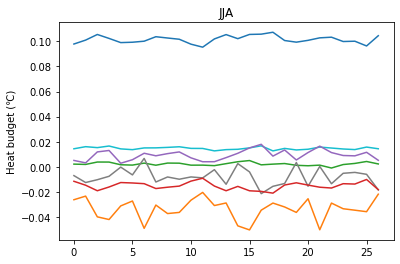

In [67]:
import matplotlib.pyplot as plt

# y坐标轴上的数据
y1 = Q_net_JJA_93_19
y2 = ZAdv_JJA_93_19
y3 = MAdv_JJA_93_19
y4 = VAdv_JJA_93_19
y5 = R_origin_JJA_93_19
y6 = dT_dt_JJA_93_19
y7 = R_recur_JJA_93_19
# 生成对应的x坐标轴上的数据
x = list(range(len(y1)))

# 绘制折线图

plt.plot(x, y1, color = '#17BECF', label = 'Q_net')
plt.plot(x, y2,  color = '#FF7F0E', label = 'ZAdv')
plt.plot(x, y3, color = '#2CA02C', label = 'MAdv')
plt.plot(x, y4, color = '#9467BD', label = 'VAdv')
plt.plot(x, y5,  color = '#7F7F7F',label = 'R')
plt.plot(x, y6,  color = '#D62728',label = 'Tend')
plt.plot(x, y7,  color = '#1F77B4', label = 'R_r')
# 添加图标题和坐标轴标签
plt.title("JJA")
# plt.xlabel("")
plt.ylabel("Heat budget (℃)")


# plt.legend()

# 显示图形
plt.show()